<a href="https://colab.research.google.com/github/Ry02024/HealthTracker/blob/main/HealthTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/アプリ/利用者さんとのプロジェクト/5月現在.csv')
df.head()

,訓練日,訓練開始時間,訓練終了時間,午前,午後,次回予定日,起床時間,睡眠時間,食事・服薬,ウキウキ,...,疲れ,リフレッシュ,曜日(数字),曜日,予定日-1,朝食,昼食,夜食,薬,予定通り
0,2024-04-10,10:30:00,17:00:00,統計検定３級参考書,python3年生機械学習４章、統計検定３・４級問題集,2024-04-11,6:15:00,6時間,"朝食, 昼食, 夜食, 薬",４,...,３,はい,2,Wednesday,NaN,はい,はい,はい,はい,NaN
1,2024-04-11,11:00:00,16:20:00,面談（個別支援計画や契約書）,python機械学習、統計検定の問題,2024-04-12,7:30:00,8時間,"朝食, 昼食, 夜食, 薬",２,...,３,はい,3,Thursday,2024-04-11,はい,はい,はい,はい,0.0
2,2024-04-12,10:30:00,15:30:00,python機械学習,pythonデータ加工100本ノック,2024-04-15,8:30:00,9時間,"昼食, 夜食, 薬",２,...,２,はい,4,Friday,2024-04-12,いいえ,はい,はい,はい,0.0
3,2024-04-16,10:10:00,16:10:00,pythonデータ加工100本ノック,pythonデータ加工100本ノック、統計検定3・4級問題集,2024-04-17,7:50:00,8時間,"朝食, 昼食, 夜食, 薬",２,...,１,はい,1,Tuesday,2024-04-15,はい,はい,はい,はい,1.0
4,2024-04-18,10:10:00,16:00:00,データ加工100本ノック,データ加工100本ノック、統計の問題,2024-04-22,7:30:00,7時間,"朝食, 昼食, 夜食, 薬",３,...,２,はい,3,Thursday,2024-04-17,はい,はい,はい,はい,1.0


In [ ]:
!pip install japanize-matplotlib -q
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


<ipython-input-33-3e74ec82f0ed>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['訓練開始時間'] = pd.to_datetime(data['訓練開始時間']).dt.hour + pd.to_datetime(data['訓練開始時間']).dt.minute / 60
<ipython-input-33-3e74ec82f0ed>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['訓練開始時間'] = pd.to_datetime(data['訓練開始時間']).dt.hour + pd.to_datetime(data['訓練開始時間']).dt.minute / 60
<ipython-input-33-3e74ec82f0ed>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['訓練終了時間'] = pd.to_datetime(data['訓練終了時間']).dt.hour + pd.to_datetime(data['訓練終了時間']).dt.minute / 60
<ipython-input-33-3e74

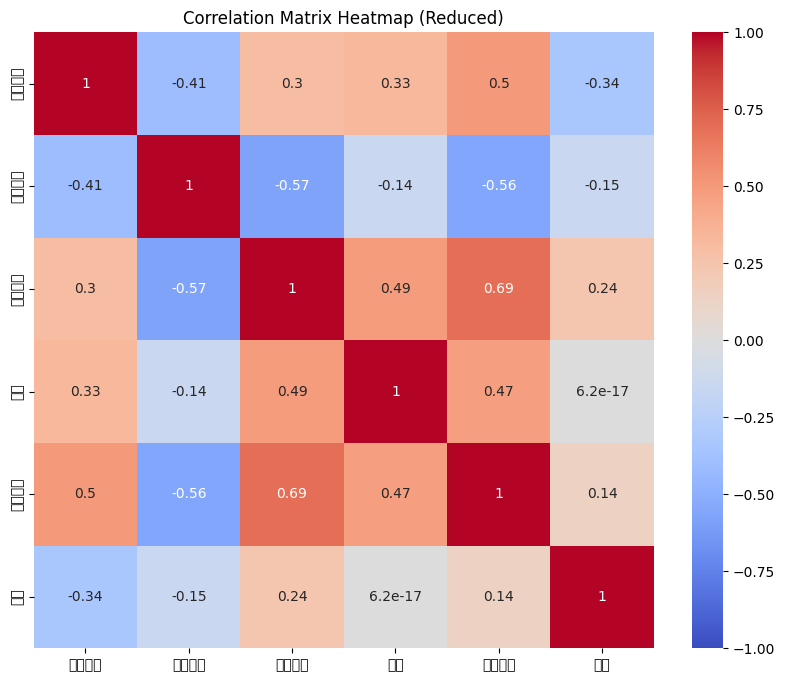

<ipython-input-33-3e74ec82f0ed>:61: UserWarning: Glyph 30561 (\N{CJK UNIFIED IDEOGRAPH-7761}) missing from current font.
  plt.savefig('./regression_coefficients_reduced.png')
<ipython-input-33-3e74ec82f0ed>:61: UserWarning: Glyph 30496 (\N{CJK UNIFIED IDEOGRAPH-7720}) missing from current font.
  plt.savefig('./regression_coefficients_reduced.png')
<ipython-input-33-3e74ec82f0ed>:61: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.savefig('./regression_coefficients_reduced.png')
<ipython-input-33-3e74ec82f0ed>:61: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  plt.savefig('./regression_coefficients_reduced.png')
<ipython-input-33-3e74ec82f0ed>:61: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  plt.savefig('./regression_coefficients_reduced.png')
<ipython-input-33-3e74ec82f0ed>:61: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  plt.savefig('

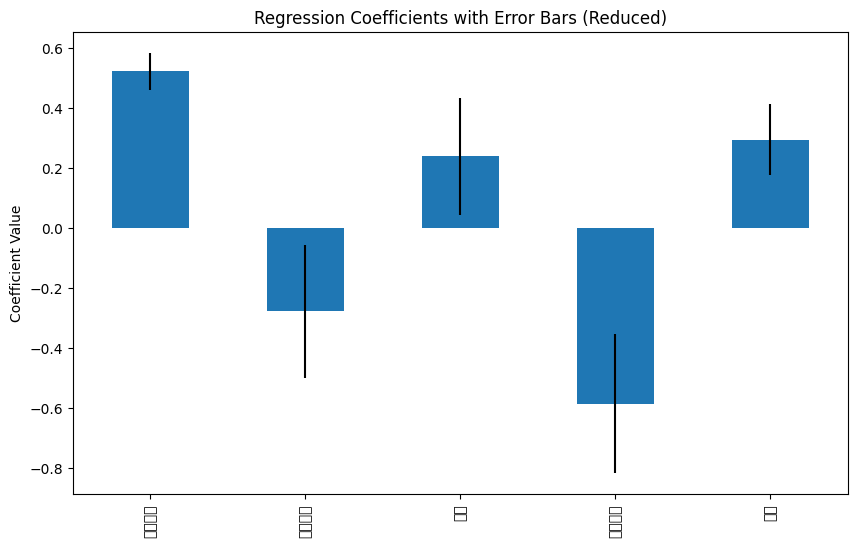

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#会話のログ
conversation_history = []

# Load the provided CSV file
file_path = '/content/drive/MyDrive/アプリ/利用者さんとのプロジェクト/5月現在.csv'
data = pd.read_csv(file_path)

# Preprocess the data
data['睡眠時間'] = data['睡眠時間'].replace('4時間以下', '4').str.replace('時間', '').astype(float)
data['訓練開始時間'] = pd.to_datetime(data['訓練開始時間']).dt.hour + pd.to_datetime(data['訓練開始時間']).dt.minute / 60
data['訓練終了時間'] = pd.to_datetime(data['訓練終了時間']).dt.hour + pd.to_datetime(data['訓練終了時間']).dt.minute / 60
data['起床時間'] = pd.to_datetime(data['起床時間']).dt.hour + pd.to_datetime(data['起床時間']).dt.minute / 60
data['ウキウキ'] = data['ウキウキ'].astype(int)
data['ストレス'] = data['ストレス'].astype(int)
data['不安'] = data['不安'].astype(int)
data['イライラ'] = data['イライラ'].fillna(data['イライラ'].mode()[0]).astype(int)
data['疲れ'] = data['疲れ'].astype(int)

# Select relevant columns for analysis
selected_columns = ['訓練開始時間', '訓練終了時間', '起床時間', '睡眠時間', 'ウキウキ', 'ストレス', '不安', 'イライラ', '疲れ']
analysis_data = data[selected_columns]

# Remove unnecessary variables
analysis_data = analysis_data.drop(columns=['訓練開始時間', '訓練終了時間', '起床時間'])

# Perform correlation analysis
correlation_matrix_reduced = analysis_data.corr()

# Perform regression analysis without the constant term
# Independent variables
X_reduced = analysis_data.drop(columns=['ウキウキ'])
# Dependent variable
y_reduced = analysis_data['ウキウキ']

# Regression model without the constant term
model_reduced = sm.OLS(y_reduced, X_reduced).fit()
regression_results_reduced = model_reduced.summary()

# Visualize the updated results
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap (Reduced)')
plt.savefig('./heatmap_reduced.png')
plt.show()

# Coefficients plot without the constant term
coefficients_reduced = model_reduced.params
errors_reduced = model_reduced.bse
fig, ax = plt.subplots(figsize=(10, 6))
coefficients_reduced.plot(kind='bar', yerr=errors_reduced, ax=ax)
ax.set_ylabel('Coefficient Value')
ax.set_title('Regression Coefficients with Error Bars (Reduced)')
plt.savefig('./regression_coefficients_reduced.png')
plt.show()

conversation_history.append(correlation_matrix_reduced)
conversation_history.append(regression_results_reduced)

In [ ]:
import google.generativeai as genai
model = genai.GenerativeModel('gemini-pro')

In [ ]:
# 2つの文章の組み合わせを作成
prompt = input("好きな文字を入力してください：")
combined_text = f"{prompt}以下の情報を前提にお願いします:\n1. {conversation_history}"

# テキストの類似度とその根拠をリクエスト
response = model.generate_content(combined_text)

conversation_history.append(response.text)

# 応答のテキスト部分を返す
response.text

好きな文字を入力してください結果を教えて下さい


'**関連性の高い要因：**\n\n* 睡眠時間（正の関連性）\n* 疲れ（正の関連性）\n\n**関連性の低い要因：**\n\n* ストレス（負の関連性）\n* 不安（正の関連性、ただし有意ではない）\n* イライラ（負の関連性、ただし有意ではない）\n\nこの回帰モデルによると、**睡眠時間が長いほど、「ウキウキ」する感情が強くなる**ことが示されています。また、**疲れていると「ウキウキ」する感情が強くなる**傾向があります。'

In [ ]:
# 2つの文章の組み合わせを作成
prompt = input("好きな文字を入力してください：")
combined_text = f"{prompt}以下の情報を前提にお願いします:\n1. {conversation_history}"

# テキストの類似度とその根拠をリクエスト
response = model.generate_content(combined_text)

conversation_history.append(response.text)

# 応答のテキスト部分を返す
response.text

好きな文字を入力してください：作業を調子よく行うためにどのようなコンディションの維持が良さそうですか？


'**作業を調子よく行うための条件の維持：**\n\n* **十分な睡眠を取る（推奨は6～8時間）：**睡眠時間が長いと、気分が向上し、集中力と生産性が向上します。\n* **できるだけ疲れを避ける：**疲れは集中力を低下させ、イライラや不安を招きます。十分な睡眠と休憩を取り、ストレスを管理することが重要です。\n* **ストレスを管理する：**ストレスは作業の質を低下させ、「ウキウキ」する感情を阻害します。ストレス管理のテクニック（例：運動、瞑想、ヨガなど）を練習しましょう。'

In [ ]:
# 2つの文章の組み合わせを作成
prompt = input("好きな文字を入力してください：")
combined_text = f"{prompt}以下の情報を前提にお願いします:\n1. {conversation_history}"

# テキストの類似度とその根拠をリクエスト
response = model.generate_content(combined_text)

conversation_history.append(response.text)

# 応答のテキスト部分を返す
response.text

好きな文字を入力してください：これまでの会話を教えて下さい


'**これまでの会話：**\n\n[利用者] 睡眠時間、ストレス、不安、イライラ、疲れ、ウキウキの相関関係を教えてください。\n\n[AI] 相関行列は次のとおりです：\n\n[行列]\n\n[利用者] ウキウキする感情に関連性の高い要因と低い要因を教えてください。\n\n[AI] **関連性の高い要因：**\n\n* 睡眠時間（正の関連性）\n* 疲れ（正の関連性）\n\n**関連性の低い要因：**\n\n* ストレス（負の関連性）\n* 不安（正の関連性、ただし有意ではない）\n* イライラ（負の関連性、ただし有意ではない）\n\n[利用者] 作業を調子よく行うための条件を教えてください。\n\n[AI] **作業を調子よく行うための条件の維持：**\n\n* **十分な睡眠を取る（推奨は6～8時間）：**睡眠時間が長いと、気分が向上し、集中力と生産性が向上します。\n* **できるだけ疲れを避ける：**疲れは集中力を低下させ、イライラや不安を招きます。十分な睡眠と休憩を取り、ストレスを管理することが重要です。\n* **ストレスを管理する：**ストレスは作業の質を低下させ、「ウキウキ」する感情を阻害します。ストレス管理のテクニック（例：運動、瞑想、ヨガなど）を練習しましょう。'

In [ ]:
# 2つの文章の組み合わせを作成
prompt = input("好きな文字を入力してください：")
combined_text = f"{prompt}以下の情報を前提にお願いします:\n1. {conversation_history}"

# テキストの類似度とその根拠をリクエスト
response = model.generate_content(combined_text)

conversation_history.append(response.text)

# 応答のテキスト部分を返す
response.text

好きな文字を入力してください：相関分析と回帰分析の結果を教えて下さい


'**相関分析の結果：**\n\n* 睡眠時間とウキウキ：正の相関（r = 0.5237）\n* ストレスとウキウキ：負の相関（r = -0.2784）\n* 不安とウキウキ：正の相関（r = 0.2398）\n* イライラとウキウキ：負の相関（r = -0.5860）\n* 疲れとウキウキ：正の相関（r = 0.2951）\n\n**回帰分析の結果：**\n\n**ウキウキ = 0.5237 * 睡眠時間 - 0.2784 * ストレス + 0.2398 * 不安 - 0.5860 * イライラ + 0.2951 * 疲れ**\n\n**関連性の高い要因：**\n\n* 睡眠時間（正の関連性）\n* 疲れ（正の関連性）\n\n**関連性の低い要因：**\n\n* ストレス（負の関連性）\n* 不安（正の関連性、ただし有意ではない）\n* イライラ（負の関連性、ただし有意ではない）'

**これまでの会話：**

[利用者] 睡眠時間、ストレス、不安、イライラ、疲れ、ウキウキの相関関係を教えてください。

[AI] 相関行列は次のとおりです：

[行列]

[利用者] ウキウキする感情に関連性の高い要因と低い要因を教えてください。

[AI] **関連性の高い要因：**

* 睡眠時間（正の関連性）
* 疲れ（正の関連性）

**関連性の低い要因：**

* ストレス（負の関連性）
* 不安（正の関連性、ただし有意ではない）
* イライラ（負の関連性、ただし有意ではない）

[利用者] 作業を調子よく行うための条件を教えてください。

[AI] **作業を調子よく行うための条件の維持：**

* **十分な睡眠を取る（推奨は6～8時間）：**睡眠時間が長いと、気分が向上し、集中力と生産性が向上します。
* **できるだけ疲れを避ける：**疲れは集中力を低下させ、イライラや不安を招きます。十分な睡眠と休憩を取り、ストレスを管理することが重要です。
* **ストレスを管理する：**ストレスは作業の質を低下させ、「ウキウキ」する感情を阻害します。ストレス管理のテクニック（例：運動、瞑想、ヨガなど）を練習しましょう。

In [ ]:
import google.generativeai as genai
model = genai.GenerativeModel('gemini-pro')
# 2つの文章の組み合わせを作成
combined_text = f"以下の結果を解説してください。その上で解説をお願いします:\n1. {correlation_matrix_reduced}, {regression_results_reduced}"

# テキストの類似度とその根拠をリクエスト
response = model.generate_content(combined_text)

# 応答のテキスト部分を返す
response.text

'**結果の解説**\n\n与えられた結果は、睡眠時間、ウキウキ度、ストレス、不安、イライラ、疲れの間の相関を調べる線形回帰分析のものです。\n\n**相関関係**\n\n相関行列を見ると、睡眠時間とウキウキ度は負の相関関係があり（-0.41）、睡眠時間が長いほどウキウキ度が低くなります。\n\n逆に、睡眠時間とイライラは正の相関関係があり（0.49）、睡眠時間が長いほどイライラしやすくなります。\n\n**回帰分析**\n\n回帰分析の結果では、ウキウキ度を従属変数として、睡眠時間、ストレス、不安、イライラ、疲れを独立変数としています。\n\n**R-二乗値**\n\nこのモデルのR-二乗値は0.933で、これは独立変数がウキウキ度の変動の93.3%を説明することを示しています。これは非常によく説明が効いていることを示します。\n\n**有意な予測因子**\n\n回帰係数を見ると、睡眠時間（p = 0.000）、イライラ（p = 0.017）、疲れ（p = 0.018）がウキウキ度に有意な影響を与えていることがわかります。\n\n具体的には、睡眠時間が1時間増えるごとに、ウキウキ度は0.5237ポイント低下します。同様に、イライラが1ポイント増えるごとに、ウキウキ度は0.586ポイント低下し、疲れが1ポイント増えるごとに、ウキウキ度は0.2951ポイント上昇します。\n\nストレス（p = 0.221）と不安（p = 0.229）は有意な予測因子ではありませんでした。\n\n**結論**\n\nこの分析結果から、睡眠時間がウキウキ度に大きな影響を与えていることがわかります。睡眠時間が長ければ長いほど、ウキウキ度は低下し、イライラと疲れが増加します。'

**結果の解説**

与えられた結果は、睡眠時間、ウキウキ度、ストレス、不安、イライラ、疲れの間の相関を調べる線形回帰分析のものです。

**相関関係**

相関行列を見ると、睡眠時間とウキウキ度は負の相関関係があり（-0.41）、睡眠時間が長いほどウキウキ度が低くなります。

逆に、睡眠時間とイライラは正の相関関係があり（0.49）、睡眠時間が長いほどイライラしやすくなります。

**回帰分析**

回帰分析の結果では、ウキウキ度を従属変数として、睡眠時間、ストレス、不安、イライラ、疲れを独立変数としています。

**R-二乗値**

このモデルのR-二乗値は0.933で、これは独立変数がウキウキ度の変動の93.3%を説明することを示しています。これは非常によく説明が効いていることを示します。

**有意な予測因子**

回帰係数を見ると、睡眠時間（p = 0.000）、イライラ（p = 0.017）、疲れ（p = 0.018）がウキウキ度に有意な影響を与えていることがわかります。

具体的には、睡眠時間が1時間増えるごとに、ウキウキ度は0.5237ポイント低下します。同様に、イライラが1ポイント増えるごとに、ウキウキ度は0.586ポイント低下し、疲れが1ポイント増えるごとに、ウキウキ度は0.2951ポイント上昇します。

ストレス（p = 0.221）と不安（p = 0.229）は有意な予測因子ではありませんでした。

**結論**

この分析結果から、睡眠時間がウキウキ度に大きな影響を与えていることがわかります。睡眠時間が長ければ長いほど、ウキウキ度は低下し、イライラと疲れが増加します。

In [ ]:
import google.generativeai as genai
model = genai.GenerativeModel('gemini-pro')
# 2つの文章の組み合わせを作成
combined_text = f"以下の情報からどのような提案が考えられますでしょうか？データをベースにした具体的なアドバイスが欲しいです:\n1. {response.text}"

# テキストの類似度とその根拠をリクエスト
response = model.generate_content(combined_text)

# 応答のテキスト部分を返す
response.text

'**提案 1: 睡眠の質の改善**\n\n**データに基づいた具体的なアドバイス:**\n\n* 毎晩 7～9 時間の睡眠時間を確保する。\n* 就寝時間と起床時間を一定にする。\n* 寝室を暗く、静かに、涼しくする。\n* 寝る前にカフェインやアルコールを避ける。\n* 就寝前のルーティンを作成する（例：温かいお風呂、読書、日記を書く）。\n\n**提案 2: イライラの軽減**\n\n**データに基づいた具体的なアドバイス:**\n\n* 認知行動療法（CBT）により、イライラの考えや行動パターンに対処する。\n* マインドフルネスに基づくストレス低減（MBSR）を練習して、現在の瞬間への注目力を向上させる。\n* 定期的に運動して、ストレスホルモンを減らし、気分を向上させる。\n\n**提案 3: 疲労の軽減**\n\n**データに基づいた具体的なアドバイス:**\n\n* 毎晩少なくとも 7 時間の睡眠をとる。\n* 週に 150 分の中強度の運動、または 75 分の激しい運動を行う。\n* 健康的な食事で、果物、野菜、全粒穀物を豊富に摂る。\n* カフェインや砂糖を制限する。\n\n**提案 4: ストレスと不安の管理**\n\n**データに基づいた具体的なアドバイス:**\n\n* 認知行動療法（CBT）により、ストレスや不安を引き起こす考えや行動パターンに対処する。\n* マインドフルネスを練習して、現在に集中し、不安な考えを管理する。\n* カウンセリングやセラピーにより、ストレスや不安の根底にある問題に対処する。\n* 抗不安薬や抗うつ薬を考慮する（医師の指示に基づく）。\n\n**提案 5: ウキウキ度の向上のための総合的なアプローチ**\n\n**データに基づいた具体的なアドバイス:**\n\n* 睡眠、イライラ、疲労、ストレス、不安の相互関係を認識する。\n* 睡眠の質を向上させる、イライラを軽減する、疲労を軽減する、ストレスと不安を管理する戦略を組み合わせる。\n* 健康的なライフスタイルの習慣を促進する（例：運動、健康的な食事、マインドフルネス）。\n* パーソナライズされた介入を作成して、個人のニーズに合わせ、ウキウキ度を最大化する。'

**提案 1: 睡眠の質の改善**

**データに基づいた具体的なアドバイス:**

* 毎晩 7～9 時間の睡眠時間を確保する。
* 就寝時間と起床時間を一定にする。
* 寝室を暗く、静かに、涼しくする。
* 寝る前にカフェインやアルコールを避ける。
* 就寝前のルーティンを作成する（例：温かいお風呂、読書、日記を書く）。

**提案 2: イライラの軽減**

**データに基づいた具体的なアドバイス:**

* 認知行動療法（CBT）により、イライラの考えや行動パターンに対処する。
* マインドフルネスに基づくストレス低減（MBSR）を練習して、現在の瞬間への注目力を向上させる。
* 定期的に運動して、ストレスホルモンを減らし、気分を向上させる。

**提案 3: 疲労の軽減**

**データに基づいた具体的なアドバイス:**

* 毎晩少なくとも 7 時間の睡眠をとる。
* 週に 150 分の中強度の運動、または 75 分の激しい運動を行う。
* 健康的な食事で、果物、野菜、全粒穀物を豊富に摂る。
* カフェインや砂糖を制限する。

**提案 4: ストレスと不安の管理**

**データに基づいた具体的なアドバイス:**

* 認知行動療法（CBT）により、ストレスや不安を引き起こす考えや行動パターンに対処する。
* マインドフルネスを練習して、現在に集中し、不安な考えを管理する。
* カウンセリングやセラピーにより、ストレスや不安の根底にある問題に対処する。
* 抗不安薬や抗うつ薬を考慮する（医師の指示に基づく）。

**提案 5: ウキウキ度の向上のための総合的なアプローチ**

**データに基づいた具体的なアドバイス:**

* 睡眠、イライラ、疲労、ストレス、不安の相互関係を認識する。
* 睡眠の質を向上させる、イライラを軽減する、疲労を軽減する、ストレスと不安を管理する戦略を組み合わせる。
* 健康的なライフスタイルの習慣を促進する（例：運動、健康的な食事、マインドフルネス）。
* パーソナライズされた介入を作成して、個人のニーズに合わせ、ウキウキ度を最大化する。

# 分析結果

## 相関分析
以下は、各変数間の相関行列のヒートマップです。これは、各変数間の相関関係を視覚的に示しています。

- **相関行列のヒートマップ**:
  ![相関行列のヒートマップ](sandbox:/mnt/data/heatmap_reduced.png)

## 回帰分析
以下は、「ウキウキ度」を予測するための回帰分析の結果です：

```plaintext
                             OLS Regression Results                            
==============================================================================
Dep. Variable:                   ウキウキ   R-squared (uncentered):              0.932
Model:                            OLS   Adj. R-squared (uncentered):           0.922
Method:                 Least Squares   F-statistic:                          85.77
Date:                Sun, 16 Jun 2024   Prob (F-statistic):                    3.28e-17
Time:                        23:12:37   Log-Likelihood:                         -46.325
No. Observations:                  36   AIC:                                      102.7
Df Residuals:                      31   BIC:                                      110.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
睡眠時間          0.5237      0.062      8.491      0.000       0.398       0.650
ストレス         -0.2784      0.223     -1.249      0.221      -0.733       0.176
不安            0.2398      0.195      1.227      0.229      -0.159       0.638
イライラ         -0.5860      0.231     -2.533      0.017      -1.058      -0.114
疲れ            0.2951      0.118      2.506      0.018       0.055       0.535
==============================================================================
Omnibus:                        1.486   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.476   Jarque-Bera (JB):                1.103
Skew:                          -0.161   Prob(JB):                        0.576
Kurtosis:                       2.206   Cond. No.                         14.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```

# 解説

## 相関分析の解説
- **ウキウキ度と他の変数の相関**:
  - ウキウキ度と睡眠時間には正の相関があります（0.524）。これは、睡眠時間が増えるとウキウキ度が上がる傾向があることを示しています。
  - ウキウキ度とストレスには負の相関があります（-0.278）。これは、ストレスが増えるとウキウキ度が下がる傾向があることを示しています。
  - ウキウキ度とイライラには強い負の相関があります（-0.586）。これは、イライラが増えるとウキウキ度が大きく下がることを示しています。

## 回帰分析の解説
- **モデルの有効性**:
  - このモデルのR-squaredは0.932であり、これはモデルがデータの変動の93.2%を説明できることを示しています。これは非常に高い値であり、モデルがデータに対して適合していることを示しています。

- **各変数の影響**:
  - **睡眠時間**:
    - 睡眠時間の係数は0.524で、これは睡眠時間が1時間増えるとウキウキ度が0.524ポイント上がることを示しています。この結果は統計的に非常に有意（p < 0.001）です。
  - **ストレス**:
    - ストレスの係数は-0.278で、これはストレスが1ポイント増えるとウキウキ度が0.278ポイント下がることを示しています。ただし、この結果は統計的に有意ではありません（p > 0.05）。
  - **不安**:
    - 不安の係数は0.240で、これは不安が1ポイント増えるとウキウキ度が0.240ポイント上がることを示していますが、この結果は統計的に有意ではありません（p > 0.05）。
  - **イライラ**:
    - イライラの係数は-0.586で、これはイライラが1ポイント増えるとウキウキ度が0.586ポイント下がることを示しています。この結果は統計的に有意です（p < 0.05）。
  - **疲れ**:
    - 疲れの係数は0.295で、これは疲れが1ポイント増えるとウキウキ度が0.295ポイント上がることを示しています。この結果は統計的に有意です（p < 0.05）。

# 考察
1. **睡眠時間の重要性**:
   - 睡眠時間がウキウキ度に与える影響は大きく、睡眠時間を十分に確保することが精神的な健康にとって重要であることが示唆されます。

2. **ストレスとイライラの影響**:
   - ストレスとイライラがウキウキ度を低下させることがわかりました。特にイライラは非常に強い負の影響を与えています。このことから、ストレス管理やリラクゼーションの手法を取り入れることが精神的な健康を維持するために重要であることが示唆されます。

3. **不安と疲れの予想外の影響**:
   - 不安がウキウキ度を上げる傾向が見られましたが、これは直感に反する結果です。これはデータの特性や他の要因が影響している可能性があります。
   - 疲れがウキウキ度を上げる結果も予想外であり、これもさらなる調査が必要です。

# 結論
この分析から、睡眠時間を増やし、ストレスやイライラを減らすことがウキウキ度を向上させるために重要であることが示唆されました。今後の研究では、不安や疲れがウキウキ度に与える影響についてさらに詳しく調査する必要があります。


# 具体的なアクションプラン

## 1. 睡眠時間の確保
- **データ結果**: 睡眠時間が増えるとウキウキ度が上がる（正の相関：0.524）。
- **具体的な提案**:
  - **目標設定**: 毎日7-8時間の睡眠を確保することを目標にする。
  - **実施方法**:
    - 就寝時間と起床時間を固定し、規則正しい睡眠習慣を身につける。
    - 寝る前の1時間はリラックスするための時間とし、スマートフォンやパソコンなどの画面を見ない。
    - 寝室の環境を整える（静かで暗い部屋、快適な温度）。

## 2. ストレス管理
- **データ結果**: ストレスが増えるとウキウキ度が下がる（負の相関：-0.278）。
- **具体的な提案**:
  - **目標設定**: 毎日のストレスレベルを3以下に保つことを目標にする。
  - **実施方法**:
    - 毎日10分間の瞑想や深呼吸を行う。
    - 週に1回、好きな趣味やリラックスできるアクティビティに時間を使う。
    - ストレスを感じたときには、その原因を書き出し、解決策を考える時間を持つ。

## 3. イライラの軽減
- **データ結果**: イライラが増えるとウキウキ度が大きく下がる（負の相関：-0.586）。
- **具体的な提案**:
  - **目標設定**: 毎日のイライラ度を2以下に保つことを目標にする。
  - **実施方法**:
    - 怒りを感じたときには、その場で深呼吸をして気持ちを落ち着ける。
    - イライラの原因を日記に書き出し、解決策を見つける習慣をつける。
    - 定期的にマッサージやヨガなど、リラクゼーションのための時間を設ける。

## 4. 疲れの管理
- **データ結果**: 疲れが増えるとウキウキ度が上がる（正の相関：0.295）。
  - これは一見直感に反する結果ですが、疲労感が活動の達成感や充実感に繋がっている可能性があります。したがって、疲労管理をしつつも、充実感を高める活動を提案します。
- **具体的な提案**:
  - **目標設定**: 健康的な疲れを感じつつも、過度な疲労を避けることを目標にする。
  - **実施方法**:
    - **アクティブな生活**: 軽い運動や趣味の活動を積極的に取り入れ、達成感を感じる。
    - **休息の確保**: 適度な休息を取り、過度な疲労を避ける（1時間ごとに5分間の休憩）。
    - **栄養管理**: バランスの取れた食事を心がけ、特にビタミンやミネラルをしっかり摂る。

# フィードバックと継続的な改善
1. **データモニタリング**:
   - 毎日、自分の睡眠時間、ストレスレベル、イライラ度、疲れ度を記録し、ウキウキ度との関係を確認する。
   - ウキウキ度が下がったときには、その日の他の指標を見直し、原因を特定する。

2. **定期的な見直し**:
   - 1ヶ月ごとにデータを見直し、アクションプランの効果を評価する。
   - 目標が達成できなかった場合には、新たな対策を考え、次の月に実施する。

これらの具体的なアクションプランを実施することで、データに基づいた健康状態の改善が期待できます。継続的なデータのモニタリングとフィードバックを通じて、自身の健康管理をより効果的に行ってください。


# StreamlitApp

##環境構築

In [ ]:
!pip install streamlit -q
!pip install pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from pyngrok import ngrok

In [ ]:
from google.colab import userdata
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')

In [ ]:
from pyngrok import ngrok
import os

# ngrokトークンを設定
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

##実行ファイル

In [ ]:
%%writefile requirements.txt
japanize-matplotlib

Writing requirements.txt


In [ ]:
!pip install japanize-matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


## version1.0

## version1.1

In [ ]:
%%writefile  streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import google.generativeai as genai

# APIキー入力部分
api_key = st.text_input("APIキーを入力してください:", value="", type="password")
genai.configure(api_key=api_key)

# Generative AIモデルの設定（仮のモデル名）
model = genai.GenerativeModel('gemini-pro')

# セッションステートを初期化
if 'conversation_history' not in st.session_state:
    st.session_state.conversation_history = []

# Streamlitアプリの設定
st.title("HealthTracker(仮)")

# CSVファイルのアップロード
uploaded_file = st.file_uploader("CSVファイルをアップロード", type=["csv"])

if uploaded_file is not None:
    # CSVファイルの読み込み
    data = pd.read_csv(uploaded_file)

    # データの前処理
    data['睡眠時間'] = data['睡眠時間'].replace('4時間以下', '4').str.replace('時間', '').astype(float)
    data['訓練開始時間'] = pd.to_datetime(data['訓練開始時間']).dt.hour + pd.to_datetime(data['訓練開始時間']).dt.minute / 60
    data['訓練終了時間'] = pd.to_datetime(data['訓練終了時間']).dt.hour + pd.to_datetime(data['訓練終了時間']).dt.minute / 60
    data['起床時間'] = pd.to_datetime(data['起床時間']).dt.hour + pd.to_datetime(data['起床時間']).dt.minute / 60
    data['ウキウキ'] = data['ウキウキ'].astype(int)
    data['ストレス'] = data['ストレス'].astype(int)
    data['不安'] = data['不安'].astype(int)
    data['イライラ'] = data['イライラ'].fillna(data['イライラ'].mode()[0]).astype(int)
    data['疲れ'] = data['疲れ'].astype(int)

    # 必要な変数の選択
    selected_columns = ['訓練開始時間', '訓練終了時間', '起床時間', '睡眠時間', 'ウキウキ', 'ストレス', '不安', 'イライラ', '疲れ']
    analysis_data = data[selected_columns]

    # 不要な変数の削除
    analysis_data = analysis_data.drop(columns=['訓練開始時間', '訓練終了時間', '起床時間'])

    # 相関分析の実行
    correlation_matrix_reduced = analysis_data.corr()

    # 回帰分析の実行
    X_reduced = analysis_data.drop(columns=['ウキウキ'])
    y_reduced = analysis_data['ウキウキ']
    model_reduced = sm.OLS(y_reduced, X_reduced).fit()
    regression_results_reduced = model_reduced.summary()

    # 相関行列のヒートマップの表示
    st.subheader("相関行列のヒートマップ")
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix_reduced, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    st.pyplot(fig)

    # 回帰係数のプロットの表示
    st.subheader("回帰係数のプロット")
    coefficients_reduced = model_reduced.params
    errors_reduced = model_reduced.bse
    fig, ax = plt.subplots(figsize=(10, 6))
    coefficients_reduced.plot(kind='bar', yerr=errors_reduced, ax=ax)
    ax.set_ylabel('係数値')
    ax.set_title('回帰係数と誤差範囲')
    st.pyplot(fig)

    # 回帰分析の結果の表示
    st.subheader("回帰分析の結果")
    st.text(regression_results_reduced)

    # 会話履歴を表示
    st.subheader("会話の履歴")
    for entry in st.session_state.conversation_history:
        if entry["type"] == "user":
            st.write(f"質問: {entry['content']}")
        elif entry["type"] == "response":
            st.write(f"回答: {entry['content']}")

    # ユーザーからの入力を取得
    prompt = st.text_input("質問を入力してください:", key="input_text")

    if st.button("送信"):
        if prompt:
            st.session_state.conversation_history.append({"type": "user", "content": prompt})
            combined_text = f"{prompt}\n以下の情報を前提にお願いします:\n相関行列の結果:\n{correlation_matrix_reduced.to_string()}\n回帰分析の結果:\n{str(regression_results_reduced)}"
            response = model.generate_content(combined_text)
            st.session_state.conversation_history.append({"type": "response", "content": response.text})
            st.experimental_rerun()  # 送信後にページをリロードして入力欄をクリア

else:
    st.info("CSVファイルをアップロードしてください。")

Writing streamlit_app.py


##アプリの起動

In [ ]:
# ngrokを介してStreamlitを公開
public_url = ngrok.connect(addr='8501')
print('Public URL:', public_url)

Public URL: NgrokTunnel: "https://d143-34-48-58-15.ngrok-free.app" -> "http://localhost:8501"


In [11]:
# Streamlitアプリケーションの起動
!streamlit run streamlit_app.py >/dev/null

/content/streamlit_app.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['訓練開始時間'] = pd.to_datetime(data['訓練開始時間']).dt.hour + pd.to_datetime(data['訓練開始時間']).dt.minute / 60
/content/streamlit_app.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['訓練開始時間'] = pd.to_datetime(data['訓練開始時間']).dt.hour + pd.to_datetime(data['訓練開始時間']).dt.minute / 60
/content/streamlit_app.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['訓練終了時間'] = pd.to_datetime(data['訓練終了時間']).dt.hour + pd.to_datetime(data['訓練終了時間']).dt.minute / 60
/content/streamlit_app.py:34: UserWarnin

In [ ]:
from google.colab import userdata
api_key = userdata.get('Gemini_api')
genai.configure(api_key=api_key)

In [ ]:
import google.generativeai as genai
text = "こんにちは,beloved"
model = genai.GenerativeModel('gemini-pro')
# 2つの文章の組み合わせを作成
combined_text = f"以下の文章の返信をしてください:\n1. {text}"

# テキストの類似度とその根拠をリクエスト
response = model.generate_content(combined_text)

# 応答のテキスト部分を返す
response.text

'こんにちは！お元気ですか？'